# **Analysing a Dataset of LEGO Pieces**

# Introduction

Today, we'll delve into a LEGO-themed dataset. We can ask a lot of intriguing questions about the LEGO company's history, their product range, and which LEGO set ultimately dominates them all using the dataset:

<ul type="square">
<li>What is the largest LEGO set ever built, and how many components did it contain?</li>

<li>What was the beginning of the LEGO company? When the first LEGO sets were released, what year was it and how many sets did the firm sell?</li>

<li>Which LEGO theme has the greatest number of sets? Is it one of LEGO's original themes, like as Ninjago, or a licenced one, such as Harry Potter or DC Superheroes?</li>

<li>When did the LEGO firm start to broaden its product line? Can we detect a shift in the company's strategy based on the number of themes and sets offered each year?</li>

<li>Did the size and complexity of LEGO kits increase over time? Is it true that older LEGO sets have more or less components than current sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) from rebrickable.com


<img src="http://localhost:8888/files/Project-for-showcase/lego_pieces_project/pics/edited_01.png?_xsrf=2%7Cae082448%7Cb2c59974ffded013c72a998ab5e595da%7C1648639608">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
colors = pd.read_csv('data_19-04-2022/colors.csv')

In [3]:
colors

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
211,1085,Two-tone Silver,737271,f
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f


In [4]:
colors.name.nunique()

216

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,178,178,178
t,38,38,38


In [6]:
colors.is_trans.value_counts()

f    178
t     38
Name: is_trans, dtype: int64

### A Few Illustrations to Help You Understand LEGO Themes and Sets

When you walk into a LEGO store, you'll see that their merchandise are organised by **theme**. Star Wars, Batman, Harry Potter, and a variety of other subjects are among them.

<img src="http://localhost:8888/files/Project-for-showcase/lego_pieces_project/pics/edited_02.png?_xsrf=2%7Cae082448%7Cb2c59974ffded013c72a998ab5e595da%7C1648639608">

A LEGO **set** is a specific LEGO box or product. As a result, a single subject usually contains a lot of different settings.

<img src="http://localhost:8888/files/Project-for-showcase/lego_pieces_project/pics/pack_set.png?_xsrf=2%7Cae082448%7Cb2c59974ffded013c72a998ab5e595da%7C1648639608">

In [7]:
sets = pd.read_csv('data_19-04-2022/sets.csv')

In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.sort_values('year').tail(10)

,set_num,name,year,theme_id,num_parts
15844,854188-1,Darth Maul Key Chain,2022,503,0
15843,854187-1,Grogu Key Chain,2022,503,0
15842,854186-1,Ahsoka Tano Key Chain,2022,503,0
15841,854159-1,2 x 4 Sand Green Key Chain,2022,503,1
15840,854158-1,French Bulldog Guy Key Chain,2022,503,0
15839,854157-1,Lady Bug Girl Key Chain,2022,503,0
15838,854154-1,Carnage Key Chain,2022,503,0
15837,854153-1,Miles Morales Key Chain,2022,503,0
15847,854194-1,Big Bird Key Chain,2022,503,0
6194,41950-1,Lots of DOTS – Lettering,2022,688,722


In [10]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
11235,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11248,700.2-1,Large Gift Set (ABB),1949,365,178
11253,700.3-1,Medium Gift Set (ABB),1949,365,142
11258,700.A-1,Small Brick Set (ABB),1949,371,24
11259,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


* Looks like LEGO started all the way back in **1949!**
* Back in **1949**, LEGO got started selling only **5 different sets!**

In [11]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
3968,31203-1,World Map,2021,709,11695
17890,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
370,10294-1,Titanic,2021,673,9092
351,10276-1,Colosseum,2020,673,9036
13073,75192-1,Millennium Falcon,2017,171,7541


* **World Map** is the largest LEGO set ever produced has around **11,695** pieces.


<img src="http://localhost:8888/files/Project-for-showcase/lego_pieces_project/pics/world_map_lego_set.jpg?_xsrf=2%7Cae082448%7Cb2c59974ffded013c72a998ab5e595da%7C1648639608">

In [12]:
sets_by_year = sets.groupby('year').count()

In [13]:
sets_by_year['set_num']

year
1949       5
1950       6
1953       4
1954      14
1955      29
        ... 
2018     872
2019     938
2020     932
2021    1074
2022     374
Name: set_num, Length: 72, dtype: int64

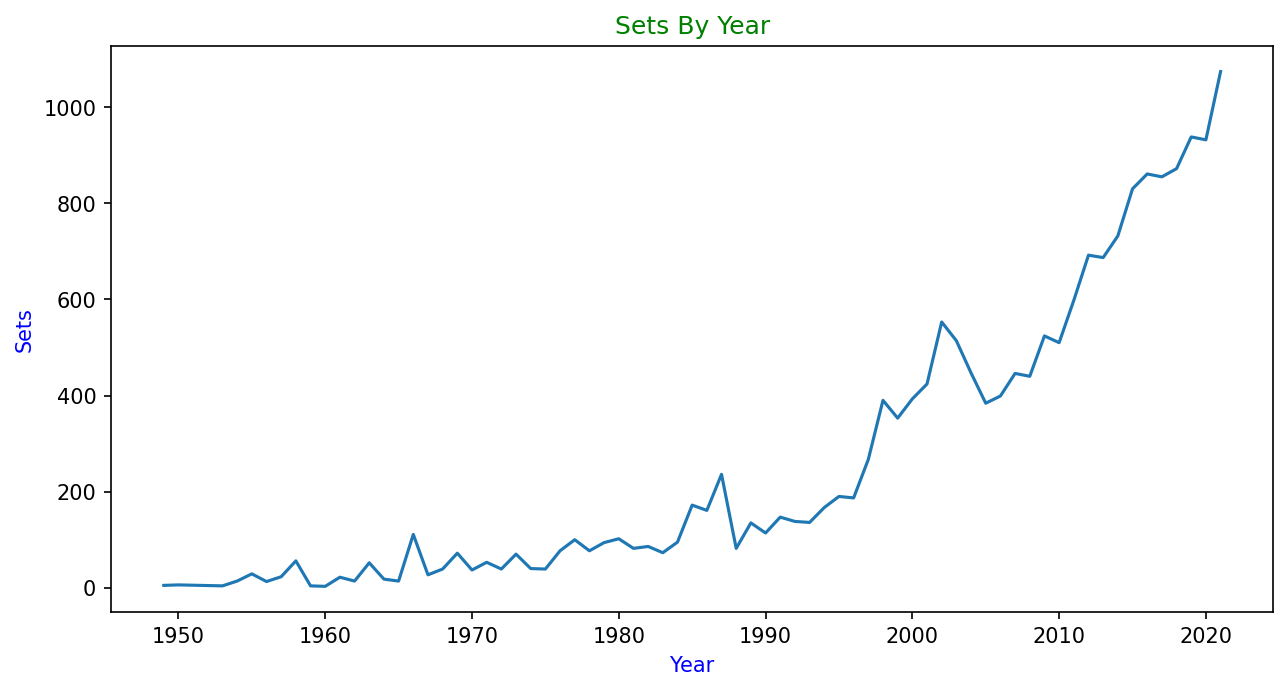

In [34]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1])
plt.xlabel('Year', color='b')
plt.ylabel('Sets', color='b')
plt.title('Sets By Year', color='g');

* We can see from this that during the first few years of its existence, LEGO only released about 10 new sets every year. However, by 2019, the company had developed dramatically, releasing 840 sets in just one year! We can also observe that, while LEGO's product offering grew steadily for the first 45 years or so, it wasn't until the mid-1990s that the quantity of sets manufactured by the corporation skyrocketed! In the graphic, we can also notice a temporary drop in the early 2000s, followed by a big comeback in 2005.

In [15]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [16]:
themes_by_year.rename(columns = {'theme_id':'nr_themes'},inplace=True)

In [17]:
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2018,89
2019,76
2020,85


* We can see that during the first few years, LEGO only had two themes, but just like the number of sets, the number of themes grew exponentially over time. Let's re-plot this on a graph.

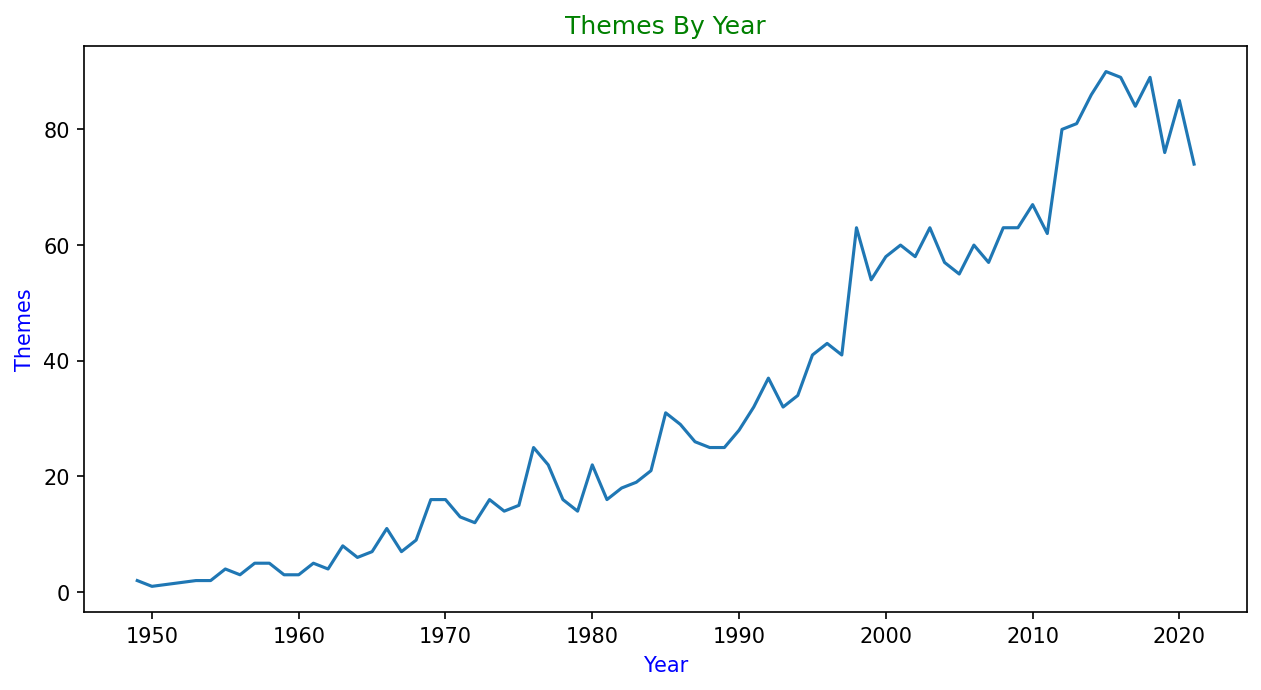

In [35]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1])
plt.xlabel('Year', color='b')
plt.ylabel('Themes', color='b')
plt.title('Themes By Year', color='g');

* We can see from the graph that until the mid-1990s, LEGO continued to offer more and more themes. From then until the early 2010s, the number of themes remained relatively constant for about ten years.

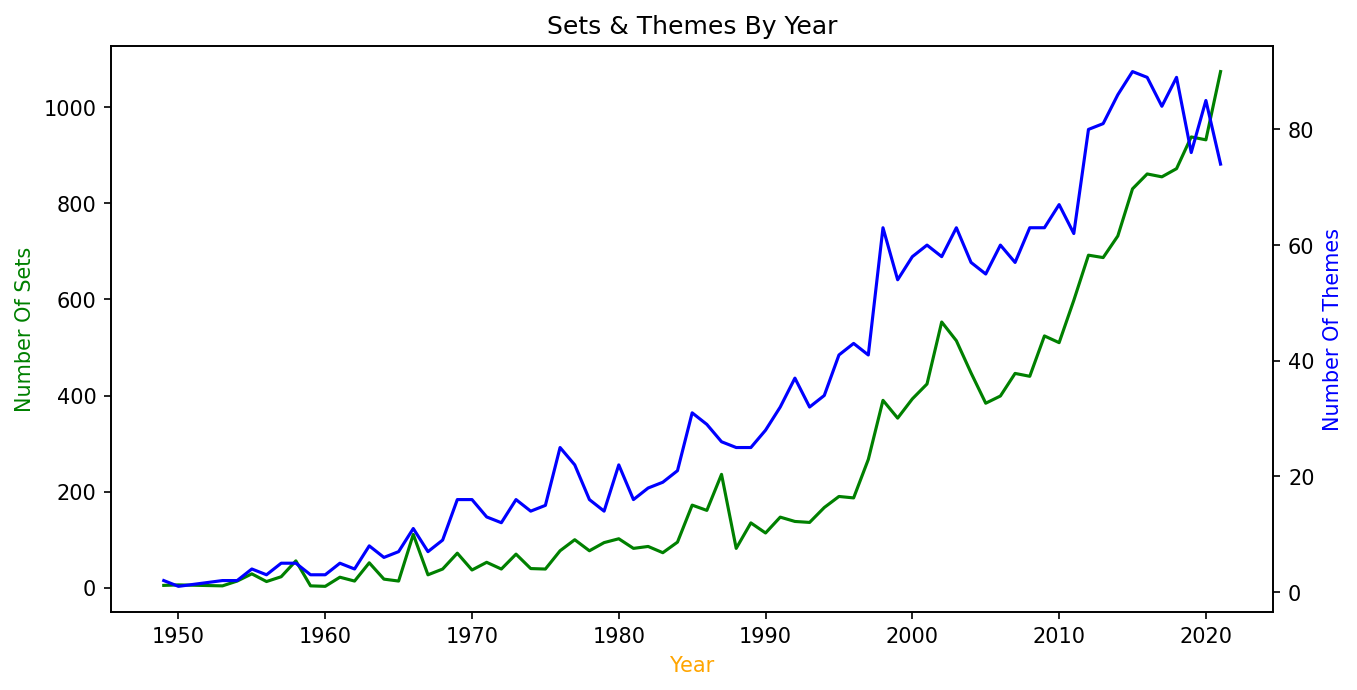

In [36]:
plt.figure(figsize=(10,5),dpi=150)
ax1 = plt.gca() 
ax2 = ax1.twinx() 

# adding styling
ax1.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1], color='g')
ax2.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1], color='b')
ax1.set_xlabel('Year', color='orange')
ax1.set_ylabel('Number Of Sets', color='green')
ax2.set_ylabel('Number Of Themes', color='blue')
ax1.set_title('Sets & Themes By Year');

In [20]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

In [21]:
parts_per_set.num_parts.max()

259.05080213903744

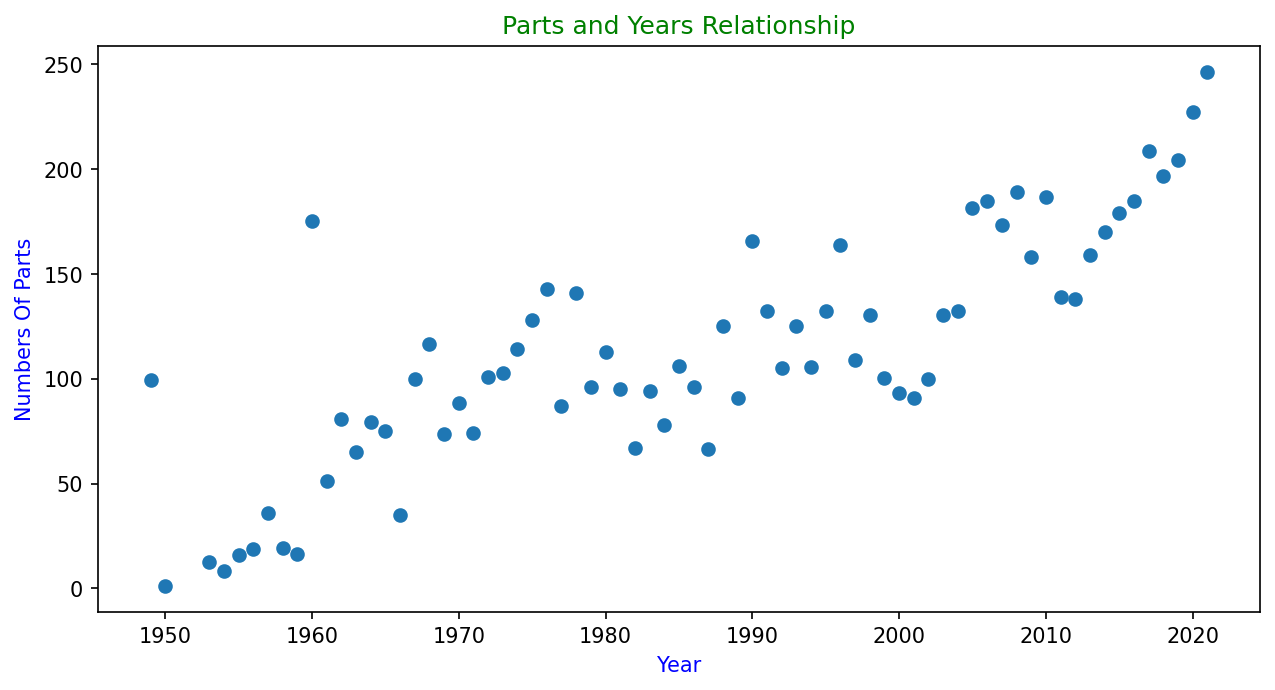

In [37]:
plt.figure(figsize=(10,5),dpi=150)
plt.scatter(parts_per_set.index[:-1], parts_per_set.num_parts[:-1])
plt.xlabel('Year', color='b')
plt.ylabel('Numbers Of Parts', color='b')
plt.title('Parts and Years Relationship', color='g');

* Based on the average number of components, we can clearly see an upward trend in the size and complexity of LEGO kits in the graph. The average LEGO set in the 2010s comprised around 200 individual parts, which is roughly double what the average LEGO set in the 1960s held.

In [23]:
set_theme_count = sets['theme_id'].value_counts()

In [24]:
set_theme_count.head()

501    2021
158     815
503     593
494     471
497     468
Name: theme_id, dtype: int64

In [25]:
themes = pd.read_csv('data_19-04-2022/themes.csv')

In [26]:
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
439,715,Marvel,535.0
440,716,Modulex,NaN
441,717,Speed Racer,NaN
442,718,Series 22 Minifigures,535.0


In [27]:
themes[themes['name'] == 'Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
78,158,Star Wars,NaN
100,209,Star Wars,207.0
130,261,Star Wars,258.0


In [28]:
sets[sets.theme_id==501]

,set_num,name,year,theme_id,num_parts
67,10000549412-1,Jurassic World - PC DVD,2015,501,0
71,1000229927-1,Harry Potter: Years 5-7 - PS Vita,2012,501,0
73,1000368666-1,Batman the Videogame - PSP,2008,501,0
74,1000381363-4,Marvel Super Heroes: Universe in Peril - DS,2013,501,0
76,1000430096-8,Marvel Super Heroes - PS4,2013,501,0
...,...,...,...,...,...
18934,XBOXGAME-1,Batman the Videogame - Xbox 360,2008,501,0
18935,XBOXGAME-2,Bionicle Heroes - Xbox 360,2006,501,0
18936,XBOXGAME-3,DC Super-Villains - Xbox One,2018,501,0
18937,XBOXGAME-9,Star Wars: The Video Game - Xbox,2005,501,0


In [29]:
sets[sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
10456,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
14100,8000-1,Pit Droid,2000,18,223
14107,8001-1,Battle Droid,2000,18,336
14118,8002-1,Destroyer Droid,2000,18,567
14137,8007-1,C-3PO,2001,18,339
14138,8008-1,Stormtrooper,2001,18,361
14139,8009-1,R2-D2,2002,18,239
14140,8010-1,Darth Vader,2002,18,388
14151,8011-1,Jango Fett,2002,18,425
14153,8012-1,Super Battle Droid,2002,18,378


In [30]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

501    2021
158     815
503     593
494     471
497     468
Name: theme_id, dtype: int64

In [31]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,2021
1,158,815
2,503,593
3,494,471
4,497,468


In [32]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,2021,Gear,NaN
1,158,815,Star Wars,NaN
2,503,593,Key Chain,501.0


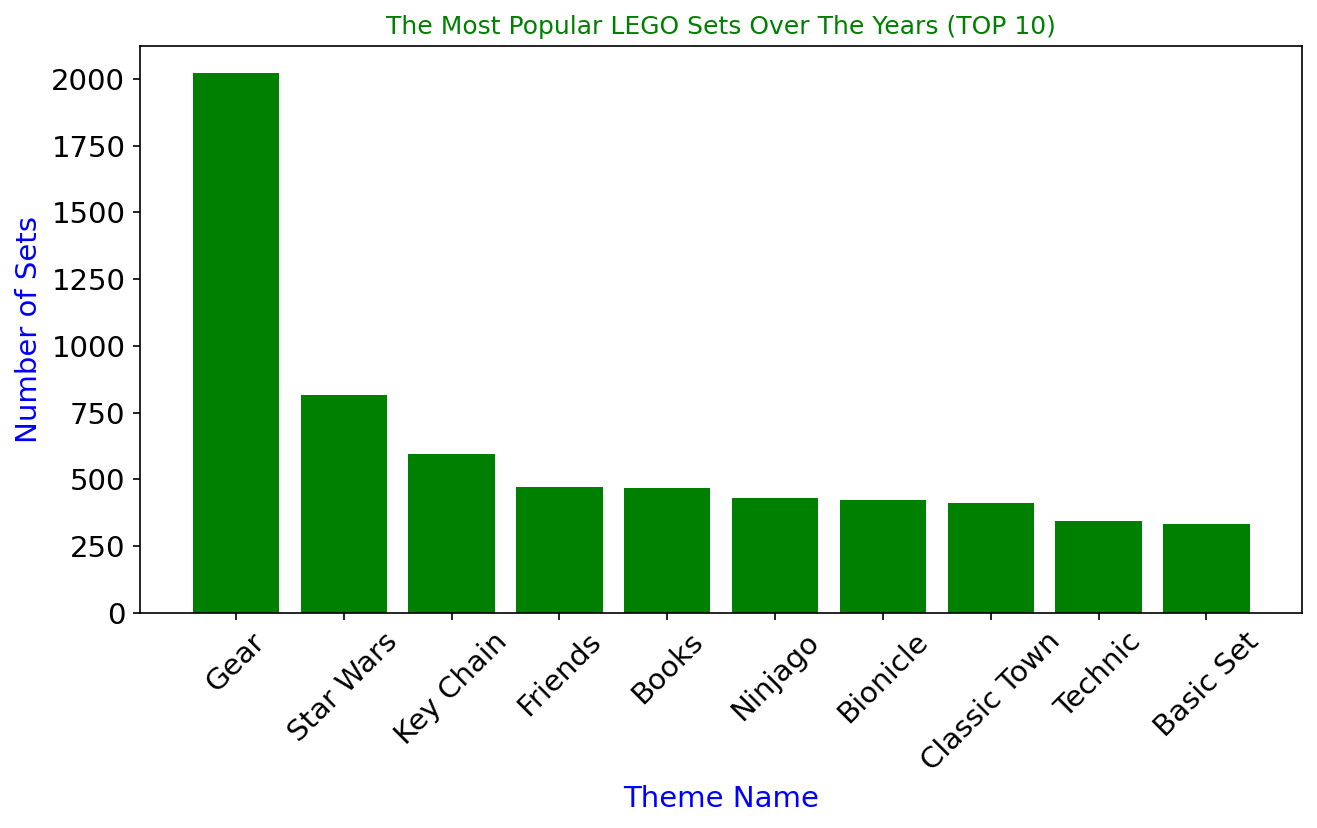

In [41]:
plt.figure(figsize=(10,5),dpi=150)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14, color='b')
plt.xlabel('Theme Name', fontsize=14, color='b')
plt.title('The Most Popular LEGO Sets Over The Years (TOP 10)', color='g')
plt.bar(merged_df.name[:10], merged_df.set_count[:10], color='g');

* Based on the graph and research above, we discovered that the Gear theme is the most popular. Lego Technic components have a gear concept. In comparison to the basic brick-building properties of regular Lego, the goal of this series is to produce more advanced creations with more intricate technological functionality.

* Without a question, Star Wars has been the most popular theme for normal Lego sets over time.